In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('D:\\gritfeat\\python\\pandas\\replace.csv')

In [102]:
df.head(50)

,Unnamed: 0,age,category,gender
0,0,22.0,スポーツ_健康飲料,男性
1,1,26.0,栄養ドリンク,男性
2,2,26.0,栄養ドリンク,男性
3,3,18.0,スポーツ_健康飲料,男性
4,4,31.0,栄養ドリンク,男性
5,5,31.0,ミネラルウォーター,男性
6,6,28.0,栄養ドリンク,女性
7,7,32.0,日本茶,男性
8,8,55.0,栄養ドリンク,女性
9,9,21.0,carbonated_soda,男性


# Finding missing values

In [103]:
df['age'].isna().sum()

124909

In [104]:
df['category'].isna().sum()

730

# Filling missing values with mean

In [105]:
df['age'].fillna(df['age'].mean(), inplace=True)
df

,Unnamed: 0,age,category,gender
0,0,22.0,スポーツ_健康飲料,男性
1,1,26.0,栄養ドリンク,男性
2,2,26.0,栄養ドリンク,男性
3,3,18.0,スポーツ_健康飲料,男性
4,4,31.0,栄養ドリンク,男性
...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性
3560827,3560827,49.0,スポーツ_健康飲料,男性
3560828,3560828,13.0,その他,男性
3560829,3560829,13.0,その他,男性


In [106]:
df['category'].fillna('unknown',inplace=True)

In [107]:
df['category'].isna().sum()

0

# Categorizing age in following groups


In [108]:
age_range = [0, 18, 26, 40, 60, 110]
age_label = ['<=18', '19-26', '27-40', '41-60', '>60']

In [109]:
df['age_group'] = pd.cut(df['age'], bins=age_range, labels=age_label)

In [110]:
df

,Unnamed: 0,age,category,gender,age_group
0,0,22.0,スポーツ_健康飲料,男性,19-26
1,1,26.0,栄養ドリンク,男性,19-26
2,2,26.0,栄養ドリンク,男性,19-26
3,3,18.0,スポーツ_健康飲料,男性,<=18
4,4,31.0,栄養ドリンク,男性,27-40
...,...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性,41-60
3560827,3560827,49.0,スポーツ_健康飲料,男性,41-60
3560828,3560828,13.0,その他,男性,<=18
3560829,3560829,13.0,その他,男性,<=18


# Translating gender and category columns

In [111]:
from deep_translator import GoogleTranslator

In [112]:
# for category

translated_eng_category = []

for jap_text in df['category'].unique():
    translation = GoogleTranslator(source='ja', target='en').translate(jap_text) 
    translated_eng_category.append(translation)
    
print(translated_eng_category)


['sports_health drink', 'Nutrition Drink', 'Mineral water', 'Japanese tea', 'carbonated_soda', 'coffee', 'milk beverage', 'fruit juice drink', 'black tea', 'Carbonated water', 'unknown', 'others', 'carbonated juice']


In [113]:
df['eng_category'] = df['category'].replace(df['category'].unique(), translated_eng_category)

In [114]:
df

,Unnamed: 0,age,category,gender,age_group,eng_category
0,0,22.0,スポーツ_健康飲料,男性,19-26,sports_health drink
1,1,26.0,栄養ドリンク,男性,19-26,Nutrition Drink
2,2,26.0,栄養ドリンク,男性,19-26,Nutrition Drink
3,3,18.0,スポーツ_健康飲料,男性,<=18,sports_health drink
4,4,31.0,栄養ドリンク,男性,27-40,Nutrition Drink
...,...,...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性,41-60,Mineral water
3560827,3560827,49.0,スポーツ_健康飲料,男性,41-60,sports_health drink
3560828,3560828,13.0,その他,男性,<=18,others
3560829,3560829,13.0,その他,男性,<=18,others


In [115]:
#for gender

translated_eng_gender = []

for jap_text in df['gender'].unique():
    translation = GoogleTranslator(source='ja', target='en').translate(jap_text) 
    translated_eng_gender.append(translation)
    
print(translated_eng_gender)

['male', 'woman', 'not clear']


In [116]:
df['eng_gender'] = df['gender'].replace(df['gender'].unique(), translated_eng_gender)

In [117]:
df

,Unnamed: 0,age,category,gender,age_group,eng_category,eng_gender
0,0,22.0,スポーツ_健康飲料,男性,19-26,sports_health drink,male
1,1,26.0,栄養ドリンク,男性,19-26,Nutrition Drink,male
2,2,26.0,栄養ドリンク,男性,19-26,Nutrition Drink,male
3,3,18.0,スポーツ_健康飲料,男性,<=18,sports_health drink,male
4,4,31.0,栄養ドリンク,男性,27-40,Nutrition Drink,male
...,...,...,...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性,41-60,Mineral water,woman
3560827,3560827,49.0,スポーツ_健康飲料,男性,41-60,sports_health drink,male
3560828,3560828,13.0,その他,男性,<=18,others,male
3560829,3560829,13.0,その他,男性,<=18,others,male


# Plotting age using matplotlib

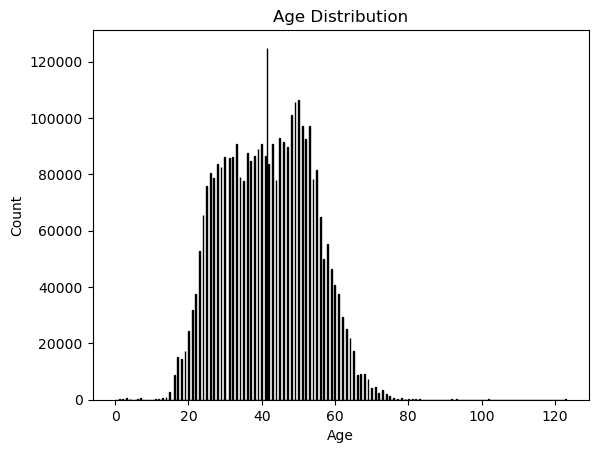

In [118]:
plt.hist(df['age'], bins=500, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()